In [1]:
# Домашнее задание 4
# Этап 1 - Воспроизведение кода из прошлой домашки

# Откройте Anaconda Prompt и выполните следующую команду
# (для Windows)
# pip install psycopg2
# (для MacOS)
# pip install psycopg2-binary

# Создаем соединение c базой данных (ВНИМАНИЕ! Ваши данные для подключения с БД могут отличаться)

# Импортируем драйвер для postgresql
import psycopg2

# Прячем пароль, чтобы все было безопасно
import getpass

# Задаем переменную для установления соединения с базой данных
conn = psycopg2.connect(user='postgres',database='postgres',host='localhost',port='5432',password=getpass.getpass('Введите пароль: '))

# Импортируем pandas для работы с таблицами
import pandas as pd
# Вводим тип рейтинга
rat_id = 14
# Создаем список, в котором будет содержаться рассматриваемый период
period = []
# Вводим дату начала периода
date1 = '2012-12-12'
# Добавляем начало периода в список
period.append(date1)
# Вводим дату окончания периода
date2 = '2015-01-01'
# Добавляем окончание периода в список
period.append(date2)
# Создаем в базе данных таблицу, в которой содержатся все присвоения рейтингов агентством Эксперт РА, где присутствуют
# дефолты из таблицы events
lllll = """DROP TABLE if exists public.dz2; CREATE TABLE public.dz2 (grade text, change text, date date, ent_name text,
rat_id smallint) TABLESPACE pg_default; ALTER TABLE public.dz2 OWNER to postgres; INSERT INTO dz2 SELECT query1.grade,
change, date, ent_name, query1.rat_id FROM (SELECT grade, change, date, ent_name, actions.rat_id FROM actions 
JOIN rat_info ON actions.rat_id = rat_info.rat_id WHERE agency_id = 'EXP') as query1 JOIN scale_exp 
ON query1.grade = scale_exp.grade; INSERT INTO dz2 
(grade, date, ent_name) SELECT grade, date, ent_name FROM events WHERE grade = 'D'; SELECT * FROM dz2;"""
# Передаем запрос в базу данных и записываем результат в переменную
lllll = pd.read_sql_query(lllll, conn)
# Выводим таблицу, содержащую актуальные рейтинги на date1
kkkkk = """select ent_name, grade from public.dz2 inner join (select max(date) as assign_date, ent_name as ent2_name
from public.dz2 where rat_id = """ + str(rat_id) + """ AND date <= '""" + period[0] + """' group by ent_name) as zapros1
on public.dz2.date = zapros1.assign_date and public.dz2.ent_name = zapros1.ent2_name where change <> 'снят' 
and change <> 'приостановлен' and rat_id = """ + str(rat_id) + """;"""
# Передаем запрос в базу данных и записываем результат в переменную
kkkkk = pd.read_sql_query(kkkkk, conn)
# Выводим таблицу, содержащую актуальные рейтинги на date2
qqqqq = """select ent_name, grade from public.dz2 inner join (select max(date) as assign_date, ent_name as ent2_name
from public.dz2 where rat_id = """ + str(rat_id) + """ AND date <= '""" + period[1] + """' group by ent_name) as zapros1
on public.dz2.date = zapros1.assign_date and public.dz2.ent_name = zapros1.ent2_name where change <> 'снят' 
and change <> 'приостановлен' and rat_id = """ + str(rat_id) + """;"""
# Передаем запрос в базу данных и записываем результат в переменную
qqqqq = pd.read_sql_query(qqqqq, conn)
# Производим слияние таблиц таким образом, чтобы в итоговой таблице содержались только данные о тех компаниях, которые
# имели актуальный недефолтный рейтинг на date1 и любой рейтинг на date2, кроме 'снят' и 'приостановлен'
aaaaa = kkkkk.merge(qqqqq, left_on = 'ent_name', right_on = 'ent_name')
aaaaa = aaaaa[(aaaaa['grade_x'] != 'D')&(aaaaa['grade_x'] != 'E')]
# Достаем столбец рейтингов из таблицы scale_exp
ppppp = "select grade from public.scale_exp"
# Передаем запрос в базу данных и записываем результат в переменную
ppppp = pd.read_sql_query(ppppp, conn)
# Отсеиваем дефолтные рейтинги, снят и приостановлен
ppppp = ppppp[0:9]
# Создаем словарь, списко и переменные, которые будем использовать в цикле
k = {}
list1 = []
default = 0
non_default = 0
# Создаем цикл, который перебирает значения рейтингов
for i in range (0, ppppp.shape[0]):
#     Извлекаем значения рейтингов из столбца
    ooooo = ppppp.iloc[i]['grade']
#     Создаем цикл, который просматривает все строчки в созданной таблице
    for j in range (0, aaaaa.shape[0]):
#         Передаем в переменную значение из столбца с актуальным на date1 рейтингом
        rrrrr = aaaaa.iloc[j]['grade_x']
#         Передаем в переменную значение из столбца с актуальным на date2 рейтингом
        wwwww = aaaaa.iloc[j]['grade_y']
#         Создаем условие, отбирающее дефолтные и недефолтные строчки
        if rrrrr == ooooo and (wwwww == 'D' or wwwww == 'E'):
            default = default + 1
        elif rrrrr == ooooo and (wwwww == 'A++' or wwwww == 'A+' or wwwww == 'A' or wwwww == 'B++' or wwwww == 'B+' or wwwww == 'B' or wwwww == 'C++' or wwwww == 'C+' or wwwww == 'C'):
            non_default = non_default + 1
#     Передаем в список количество дефолтных компаний для данной рейтинговой категории        
    list1.append(default)
#     Передаем в список количество недефолтных компаний для данной рейтинговой категории 
    list1.append(non_default)
#     Добавляем список в словарь
    k[ooooo] = list1
#     Обнуляем переменные и список для дальнейшей корректной работы
    default = 0
    non_default = 0
    list1 = []
# Создаем таблицу из полученного словаря
wau = pd.DataFrame(k)
# Транспонируем таблицу
wau = wau.T
# Создаем названия столбцов
clms = ('default', 'non-default')
# Переименовываем столбцы
wau.columns = clms
# Переименовываем индекс
wau.index.names = ['rating']
tre = pd.DataFrame(k)
tre = tre.T
tre.columns = clms
tre.index.names = ['rating']
tre['sum'] = tre['default'] + tre['non-default']
# Выводим итоговую таблицу распределения
wau

Введите пароль: ········


,default,non-default
rating,,
A++,0,2
A+,0,17
A,0,89
B++,2,36
B+,0,1
B,0,0
C++,0,0
C+,0,0
C,0,0


Добрый вечер. Скажите, пожалуйста, что вы хотели бы экспортировать? Могу вам предложить таблицу, содержащую распределение
дефолтеров и недефолтеров по разным рейтингам (напишите для этого 1). Также могу предложить вам симпатичную столбчатую
диаграмму того же самого распределения (напишите для этого 2). 2
Введите, пожалуйста, имя графика: 
Укажите, пожалуйста, директорию для сохранения файла(например: C:/Users/Сергей/Downloads/): C:/Users/Сергей/Downloads/


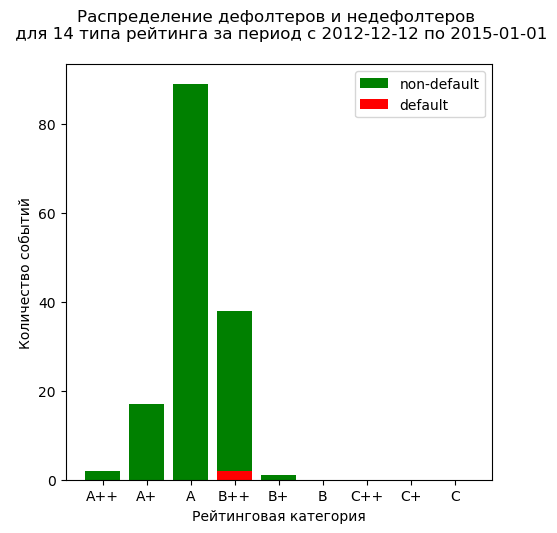

In [14]:
# Этап 2 - Экспорт таблицы или графика

import matplotlib.pyplot as plt
xyz = int(input('''Добрый вечер. Скажите, пожалуйста, что вы хотели бы экспортировать? Могу вам предложить таблицу, содержащую распределение
дефолтеров и недефолтеров по разным рейтингам (напишите для этого 1). Также могу предложить вам симпатичную столбчатую
диаграмму того же самого распределения (напишите для этого 2). '''))
if xyz == 1:
    tbl_name = input('Введите, пожалуйста, имя таблицы: ')
    if tbl_name == '':
        tbl_name = 'default_distr'
    direct = input('Укажите, пожалуйста, директорию для сохранения файла(например: C:/Users/Сергей/Downloads/): ')
    wau.to_csv(direct + tbl_name + '.csv')
elif xyz == 2:
    fig_name = input('Введите, пожалуйста, имя графика: ')
    if fig_name == '':
        fig_name = 'default_distr'
    direct = input('Укажите, пожалуйста, директорию для сохранения файла(например: C:/Users/Сергей/Downloads/): ')
    plt.figure(figsize=(5.5, 5.5), dpi = 100)
    plt.bar(tre.index, tre['sum'],color = 'g')
    plt.bar(tre.index, tre['default'],color = 'r')
    plt.legend(['non-default','default'])
    plt.xlabel('Рейтинговая категория')
    plt.ylabel('Количество событий')
    plt.title('Распределение дефолтеров и недефолтеров \n для ' + str(rat_id) + ' типа рейтинга за период с ' + period[0] + ' по ' + period[1] + '\n')
    plt.savefig(direct + fig_name + '.png', dpi = 100)

In [16]:
# Этап 3 - Автоматическое создание мини-отчета о проделанной работе

# Подготовительные работы

# 1) В Anaconda Prompt выполнить:
# pip install jinja2
# pip install weasyprint
# pip install --upgrade pip setuptools
# 2) Установка c настройками по умолчанию https://github.com/tschoonj/GTK-for-Windows-Runtime-Environment-Installer/releases/download/2019-11-07/gtk3-runtime-3.24.12-2019-11-07-ts-win64.exe
# 3) В Anaconda Prompt выполнить:
# SET PROPER_GTK_FOLDER='C:\Program Files\GTK3-Runtime Win64\bin'
# SET PATH=%PROPER_GTK_FOLDER%;%PATH%
# PATH (убедиться, что в списке директорий появилась добавленная)
# 4) Перезапустить Python и исполнить код с генерацией отчета ниже
# 5) На предыдущем этапе загрузите, пожалуйста, картинку, если до этого вы выбирали таблицу

# Непосредственно собираем отчет в виде pdf

from __future__ import print_function
from jinja2 import Environment, FileSystemLoader
from weasyprint import HTML, Document
import os

env = Environment(loader=FileSystemLoader('.'))
# Шаблон выложен в папке seminars на GitHub, его можно редактировать под себя
# Его необходимо скачать и поместить в рабочую директорию
template = env.get_template("myreport.html")
template_vars = {"title": "Отчет составлен Морозовым Сергеем Александровичем",
                "INTRO": "Данный отчет содержит информацию о распределении дефолтеров и недефолтеров для " + str(rat_id) + " типа рейтинга за период с " + period[0] + " по " + period[1], 
                 "TABLE_DESC": "В таблице представлено распределение дефолтеров и недефолтеров для " + str(rat_id) + " типа рейтинга за период с " + period[0] + " по " + period[1], 
                 "TABLE": wau.to_html(), 
                 "IMAGE_DESC": "На диаграмме изображено распределение дефолтеров и недефолтеров для " + str(rat_id) + " типа рейтинга за период с " + period[0] + " по " + period[1], 
                 "IMAGE": os.path.realpath(direct + fig_name + '.png')
                }
# Собираем и печатаем репорт
rep_name = input('Введите, пожалуйста, имя отчета: ')
dir_name = input('Введите, пожалуйста, директорию для сохранения отчета(например: C:/Users/Сергей/Downloads/): ')
if rep_name == '':
    rep_name = 'default_distr_rep'
html_out = template.render(template_vars, presentational_hints=True)
HTML(string=html_out).write_pdf(dir_name + rep_name + '.pdf', presentational_hints=True)

Введите, пожалуйста, имя отчета: 
Введите, пожалуйста, директорию для сохранения отчета(например: C:/Users/Сергей/Downloads/): C:/Users/Сергей/Downloads/
